In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [3]:
def MASeries(coeffs, std, nPoints):
    q = len(coeffs) - 1
    np.random.seed()
    gaussNoise = np.random.normal(0.0, std, nPoints+q)
    x = []
    for i in range(q, nPoints+q):
        xNew = coeffs[0] + gaussNoise[i]
        for j in range(1, q+1):
            xNew += coeffs[j]*gaussNoise[i-j]
        x.append(xNew)
    return x

In [4]:
test = MASeries([0.0, 0.5], 1, 5000)

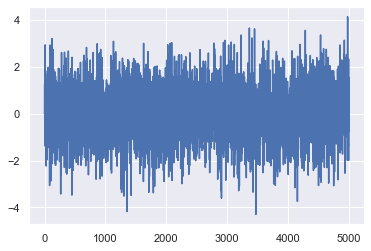

In [5]:
plt.plot(test)
plt.show()

In [6]:
np.var(test)

1.2656320564651702

In [7]:
test2 = MASeries([0.0, 0.5, 0.2], 1, 5000)
np.var(test2)

1.2677343776352337

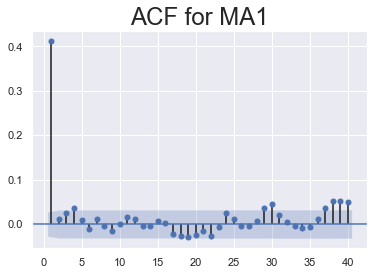

In [8]:
sgt.plot_acf(test, zero=False, lags=40)
plt.title("ACF for MA1", size=24)
plt.show()

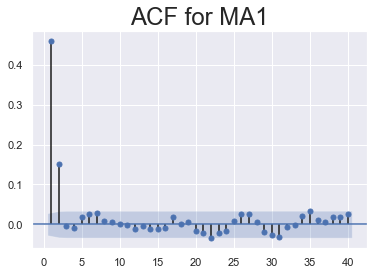

In [9]:
sgt.plot_acf(test2, zero=False, lags=40)
plt.title("ACF for MA1", size=24)
plt.show()

In [10]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [17]:
#help(arma_generate_sample)
arparams = np.array([0.,0.])
maparams = np.array([0.,0.5])
ar = np.r_[1,-arparams]
ma = np.r_[1,maparams]
nobs = 250
np.random.seed(2014)
y = arma_generate_sample(ar, ma, nobs)

In [18]:
np.var(y)

1.1403067468882913

In [19]:
from statsmodels.tsa.arima_process import ArmaProcess

In [24]:
ar = np.array([1.,0.])
ma = np.array([0.,0.5])
ARMA_object = ArmaProcess(ar, ma)
yAnother = ARMA_object.generate_sample(nsample=5000)

In [39]:
arparams = np.array([0.])
maparams = np.array([0.5, 0.2])
ar = np.r_[1,-arparams]
ma = np.r_[1,maparams]
nobs = 5000
np.random.seed(2014)
ar1 = arma_generate_sample(ar, ma, nobs)

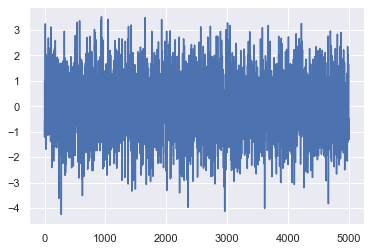

In [40]:
plt.plot(ar1)

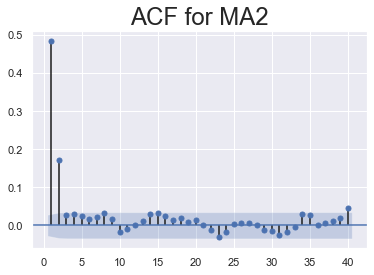

In [42]:
sgt.plot_acf(ar1, zero=False, lags=40)
plt.title("ACF for MA2", size=24)
plt.show()

In [43]:
arparams = np.array([0.5, 0.2])
maparams = np.array([0.5, 0.3])
ar = np.r_[1,-arparams]
ma = np.r_[1,maparams]
nobs = 5000
np.random.seed(2014)
example1 = arma_generate_sample(ar, ma, nobs)

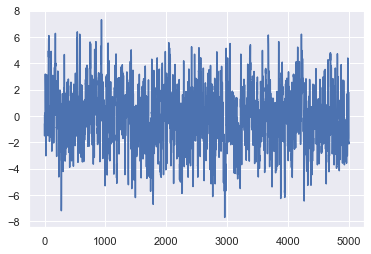

In [44]:
plt.plot(example1)

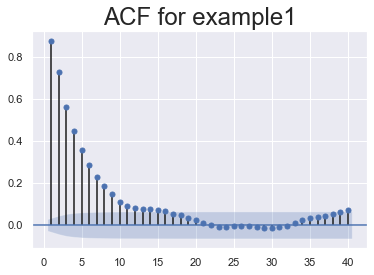

In [45]:
sgt.plot_acf(example1, zero=False, lags=40)
plt.title("ACF for example1", size=24)
plt.show()

In [47]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [49]:
res = arma_order_select_ic(example1, ic=['aic', 'bic'], trend='nc')
res.aic_min_order

(2, 2)

In [50]:
res.bic_min_order

(2, 2)